In [27]:
import pandas as pd

cell_sample = pd.read_csv('E:\Pythoncode\Coursera\Classification_Algorithms\SVM\Cancer_Cell\cell_samples.csv')

cell_sample.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [28]:
# checking if all the data are present
cell_sample.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [30]:
# In Class '2' implies Benign and '4' implies Maligant
# Plots for Data Visualization
import matplotlib.pyplot as plt

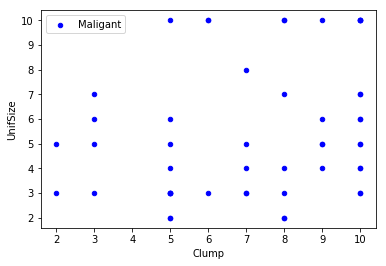

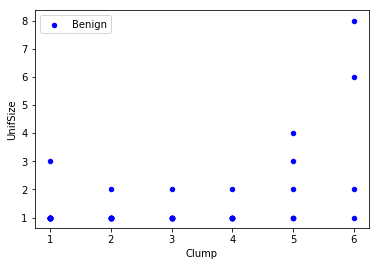

In [35]:
# for Maligant Class, scatter plot between Clump Thickness and Uniformity of cell size

cell_sample[cell_sample['Class'] == 4][0:50].plot(kind = 'scatter', x = 'Clump', y= 'UnifSize', color ='blue', label = 'Maligant');
cell_sample[cell_sample['Class'] == 2][0:50].plot(kind = 'scatter', x = 'Clump', y= 'UnifSize', color ='blue', label = 'Benign');
plt.show()

In [38]:
# Before SVM, Checking the datatype of the datas.
cell_sample.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [41]:
# Some datas of BareNuc is not defined so we will remove these dataset

cell_sample = cell_sample[pd.to_numeric(cell_sample['BareNuc'],errors = 'coerce').notnull()]
# if BareNuc is not numeric then it will be changed to NaN (error ='coerce'). '.notnull' function will delete that row


In [43]:
cell_sample.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [46]:
cell_sample.count()

ID             683
Clump          683
UnifSize       683
UnifShape      683
MargAdh        683
SingEpiSize    683
BareNuc        683
BlandChrom     683
NormNucl       683
Mit            683
Class          683
dtype: int64

In [54]:
# data had been removed, Now changing the data type of 'BareNuc' from object to int
cell_sample['BareNuc'] = cell_sample['BareNuc'].astype('int64')

In [55]:
cell_sample.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [57]:
# Dividing the dataframe into feature and target set arrays

import numpy as np

feature_set = cell_sample[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_set)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [59]:
target_set = cell_sample[['Class']].astype('int')
y = np.asarray(target_set)
y[0:5]

array([[2],
       [2],
       [2],
       [2],
       [2]])

In [63]:
# splitting into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (546, 9) (546, 1)
Test set: (137, 9) (137, 1)


In [68]:
# Using rbf as kernel for SVM

from sklearn import svm
reg = svm.SVC(kernel='rbf')
reg.fit(X_train, y_train.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [70]:
y_hat = reg.predict(X_test)
y_hat[0:5]

array([2, 4, 2, 4, 2])

In [72]:
# now using jaccard metric 
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, y_hat)

0.9635036496350365